**Realizando Importações**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Carregando o DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AprendizadoDeMaquina/datasets/google.csv')
df

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


In [ ]:
df.shape

(5456, 26)

# Pré-processamento e análise dos dados

In [ ]:
df = df.drop(df.columns[[0,25]], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category 1   5456 non-null   float64
 1   Category 2   5456 non-null   float64
 2   Category 3   5456 non-null   float64
 3   Category 4   5456 non-null   float64
 4   Category 5   5456 non-null   float64
 5   Category 6   5456 non-null   float64
 6   Category 7   5456 non-null   float64
 7   Category 8   5456 non-null   float64
 8   Category 9   5456 non-null   float64
 9   Category 10  5456 non-null   float64
 10  Category 11  5456 non-null   object 
 11  Category 12  5455 non-null   float64
 12  Category 13  5456 non-null   float64
 13  Category 14  5456 non-null   float64
 14  Category 15  5456 non-null   float64
 15  Category 16  5456 non-null   float64
 16  Category 17  5456 non-null   float64
 17  Category 18  5456 non-null   float64
 18  Category 19  5456 non-null   float64
 19  Catego

In [ ]:
np.sum(df.isnull()==True)

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [ ]:
df = df.dropna()
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [ ]:
np.sum(df.isnull()==True)

Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [ ]:
df

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
2,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
3,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
4,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
5452,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
5453,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11
5454,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12


In [ ]:
minmax_scale = preprocessing.MinMaxScaler()

df = minmax_scale.fit_transform(df)
df = pd.DataFrame(df)

In [ ]:
names = [
    'churches', 'resorts', 'beaches', 'parks', 'theatres',
    'museums', 'malls', 'zoo', 'restaurants','pubs_bars',
    'local_services','burger_pizza', 'hotels','juice_bars', 
    'art_galleries', 'dance_clubs', 'swimming_pools',
    'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
    'monuments','gardens'
]

df.columns = names

In [ ]:
df

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza,hotels,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.000,0.000,0.726,0.676259,1.000000,0.465296,1.000000,0.359903,0.358173,0.436754,0.218009,0.215640,0.219858,0.226415,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
1,0.000,0.000,0.726,0.676259,1.000000,0.465296,1.000000,0.429952,0.358173,0.439141,0.218009,0.215640,0.219858,0.226415,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
2,0.000,0.000,0.726,0.671463,1.000000,0.465296,1.000000,0.429952,0.358173,0.436754,0.218009,0.215640,0.219858,0.226415,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
3,0.000,0.100,0.726,0.671463,1.000000,0.465296,1.000000,0.359903,0.358173,0.436754,0.225118,0.215640,0.219858,0.226415,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
4,0.000,0.000,0.726,0.671463,1.000000,0.465296,1.000000,0.429952,0.358173,0.436754,0.218009,0.215640,0.219858,0.226415,0.348,0.118,0.100,0.000,0.100,0.000,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,0.182,1.000,0.800,0.470024,0.425258,0.375321,0.337629,0.055556,0.223558,0.054893,0.056872,0.066351,0.122931,0.125000,1.000,0.132,0.130,0.132,0.138,1.000,0.210,1.0,1.0,0.312
5450,0.186,1.000,0.804,0.470024,0.427835,0.375321,0.167526,0.050725,0.221154,0.050119,0.054502,0.061611,0.118203,0.120283,0.178,0.130,0.128,0.130,0.318,0.324,0.212,1.0,1.0,0.218
5451,0.188,1.000,0.806,0.472422,0.427835,0.375321,0.162371,0.045894,0.218750,0.045346,0.049763,0.052133,0.073286,0.115566,0.174,0.130,0.126,0.128,0.148,1.000,0.214,1.0,1.0,0.222
5452,0.190,0.810,0.810,0.474820,0.430412,0.341902,0.164948,0.041063,0.216346,0.040573,0.045024,0.047393,0.068558,0.110849,1.000,0.128,0.126,0.128,0.150,1.000,0.216,1.0,1.0,0.224


In [ ]:
pca = PCA(n_components= 2)
pca_1 = pca.fit_transform(df)

In [ ]:
df_pca = pd.DataFrame({'PCA_1': pca_1[:, 0], 'PCA_2': pca_1[:, 1]})
df_pca

,PCA_1,PCA_2
0,-0.049945,-0.587766
1,-0.063780,-0.605550
2,-0.064391,-0.603873
3,-0.039818,-0.592933
4,-0.064391,-0.603873
...,...,...
5449,0.984337,0.561526
5450,1.159797,0.361039
5451,1.232910,0.433139
5452,1.027589,0.635187


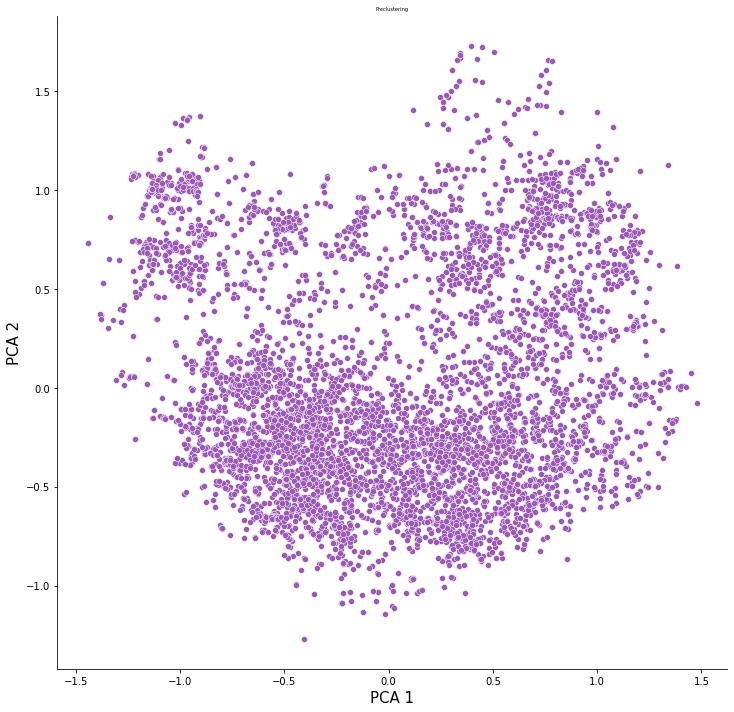

In [ ]:
cluster_test = plt.subplots(figsize=(12, 12))

cluster_test = sns.scatterplot(x = 'PCA_1', y = 'PCA_2', data = df_pca, color = '#9b59b6')

sns.despine()
cluster_test.set_xlabel('PCA 1', fontsize = 15)
cluster_test.set_ylabel('PCA 2', fontsize = 15)
cluster_test.set_title('Preclustering', fontsize = 5)
plt.show()

# K-Means

# Usando PCA

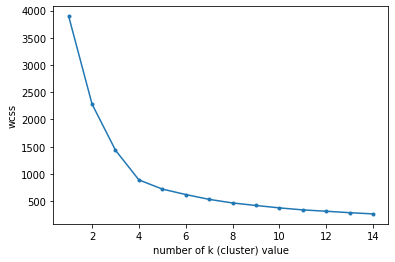

In [ ]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
   
plt.plot(range(1,15),wcss, '.-')
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit_predict(df_pca)
df_pca['label'] = kmeans.labels_

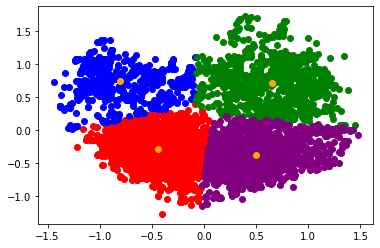

In [ ]:
plt.scatter(df_pca.PCA_1[df_pca.label == 0], df_pca.PCA_2[df_pca.label == 0], color="red")
plt.scatter(df_pca.PCA_1[df_pca.label == 1], df_pca.PCA_2[df_pca.label == 1], color="blue")
plt.scatter(df_pca.PCA_1[df_pca.label == 2], df_pca.PCA_2[df_pca.label == 2], color="green")
plt.scatter(df_pca.PCA_1[df_pca.label == 3], df_pca.PCA_2[df_pca.label == 3], color="purple")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="orange")

In [ ]:
df_pca = df_pca.drop(columns=['label'])

# Agglomerative Clustering

In [ ]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(df_pca)

df_pca["label"] = cluster
df_pca

,PCA_1,PCA_2,label
0,-0.049945,-0.587766,1
1,-0.063780,-0.605550,1
2,-0.064391,-0.603873,1
3,-0.039818,-0.592933,1
4,-0.064391,-0.603873,1
...,...,...,...
5449,0.984337,0.561526,2
5450,1.159797,0.361039,4
5451,1.232910,0.433139,2
5452,1.027589,0.635187,2


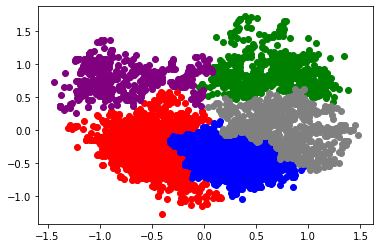

In [ ]:
plt.scatter(df_pca.PCA_1[df_pca.label == 0], df_pca.PCA_2[df_pca.label == 0], color="red")
plt.scatter(df_pca.PCA_1[df_pca.label == 1], df_pca.PCA_2[df_pca.label == 1], color="blue")
plt.scatter(df_pca.PCA_1[df_pca.label == 2], df_pca.PCA_2[df_pca.label == 2], color="green")
plt.scatter(df_pca.PCA_1[df_pca.label == 3], df_pca.PCA_2[df_pca.label == 3], color="purple")
plt.scatter(df_pca.PCA_1[df_pca.label == 4], df_pca.PCA_2[df_pca.label == 4], color="gray")

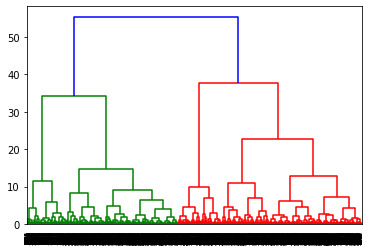

In [ ]:
data = ward(df_pca)
data_deng = dendrogram(data)

In [ ]:
df_pca = df_pca.drop(columns=['label'])

# DBSAN

In [ ]:
df_pca

,PCA_1,PCA_2
0,-0.049945,-0.587766
1,-0.063780,-0.605550
2,-0.064391,-0.603873
3,-0.039818,-0.592933
4,-0.064391,-0.603873
...,...,...
5449,0.984337,0.561526
5450,1.159797,0.361039
5451,1.232910,0.433139
5452,1.027589,0.635187


In [ ]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)
# 2,10
cluster_dbscan = dbscan_cluster.fit_predict(df_pca)

df_pca["label"] = cluster_dbscan
df_pca["label"].unique()

array([ 0,  1,  2,  3,  4,  5,  6, -1])

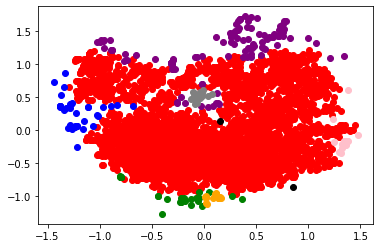

In [ ]:
plt.scatter(df_pca.PCA_1[df_pca.label == 0], df_pca.PCA_2[df_pca.label == 0], color="red")
plt.scatter(df_pca.PCA_1[df_pca.label == 1], df_pca.PCA_2[df_pca.label == 1], color="blue")
plt.scatter(df_pca.PCA_1[df_pca.label == 2], df_pca.PCA_2[df_pca.label == 2], color="green")
plt.scatter(df_pca.PCA_1[df_pca.label == 3], df_pca.PCA_2[df_pca.label == 3], color="purple")
plt.scatter(df_pca.PCA_1[df_pca.label == 4], df_pca.PCA_2[df_pca.label == 4], color="orange")
plt.scatter(df_pca.PCA_1[df_pca.label == 5], df_pca.PCA_2[df_pca.label == 5], color="gray")
plt.scatter(df_pca.PCA_1[df_pca.label == 6], df_pca.PCA_2[df_pca.label == 6], color="pink")
plt.scatter(df_pca.PCA_1[df_pca.label == -1], df_pca.PCA_2[df_pca.label == -1], color="black")

In [ ]:
df_pca.drop(columns=['label'])

,PCA_1,PCA_2
0,-0.049945,-0.587766
1,-0.063780,-0.605550
2,-0.064391,-0.603873
3,-0.039818,-0.592933
4,-0.064391,-0.603873
...,...,...
5449,0.984337,0.561526
5450,1.159797,0.361039
5451,1.232910,0.433139
5452,1.027589,0.635187


----------------------------------------------------------------------------------------------